In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# This is our dataset, we need to predict y given x
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [3]:
# Converting lists to tensors to be able to use with pytorch
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
# .float is to convert the datatype to float

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [9]:
class MyNeuralNet(nn.Module):
  def __init__(self):  
    # When we call the super.__init__() method we ensure we are inhertiting   
    super().__init__()
    self.layer1 = nn.Linear(2,8) # A linear layer
    self.activation = nn.ReLU() # activation function
    self.layer2 =  nn.Linear(8,1)

  # When we pass something through the model object, it calls the forward function 
  def forward(self,x):
    x = self.layer1(x)
    x = self.activation(x)
    x = self.layer2(x)
    return x

In [10]:
model = MyNeuralNet()

In [11]:
loss_func = nn.MSELoss()

In [12]:
opt = SGD(model.parameters(), lr = 0.001)

In [13]:
losses = []
for _ in range(50): #Running for 50 epochs
  opt.zero_grad() # Setting gradients to zero before every epoch
  loss_value = loss_func(model(X),Y)
  #  the gradients of the loss function with respect to all the trainable parameters of the network are computed and stored in the grad attribute of the corresponding tensors.
  loss_value.backward()

  # opt.step() is to update the weights and biases of the neural network using the computed gradients and the chosen optimization algorithm
  opt.step() 
  losses.append(loss_value.detach().numpy())

Text(0, 0.5, 'loss value')

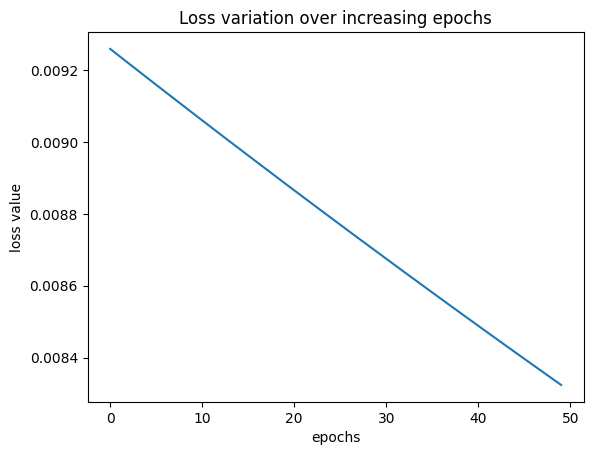

In [ ]:
plt.plot(losses)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')